'''
【课程2.10】  时间线图表、热图

tsplot() / heatmap()

'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

sns.set_style("darkgrid")           # 设置风格、尺度
sns.set_context("paper")


import warnings
warnings.filterwarnings('ignore')   # 不发出警告


(10, 31)
         0         1         2         3         4         5         6   \
0  0.282008  0.760915  0.598127  1.203631  0.989267  0.909525  0.326901   
1  1.383278  1.214394  2.293784  2.298025  2.567645  1.576818  1.420633   
2  1.082980  1.075342  2.225310  2.217532  1.728568  1.923570  1.136421   
3 -1.186671 -0.624646  0.064841  0.589373  0.205926 -0.272350 -0.915415   
4  0.202539  1.346454  1.474857  1.850514  1.539148  0.759953  0.986175   

         7         8         9     ...           21        22        23  \
0 -0.562333 -0.604572 -0.603357    ...    -0.928567 -0.452267 -0.718840   
1  0.465195  0.595697  0.172612    ...     0.287157  0.381645  0.724542   
2  0.696424  0.316124  0.395917    ...    -0.167252 -0.087325  0.167813   
3 -1.303779 -1.553812 -2.206679    ...    -1.922913 -1.585776 -1.488609   
4  0.117202 -0.535127 -0.287611    ...     0.183482 -0.533597 -0.266417   

         24        25        26        27        28        29        30  
0 -0.641697 -0.

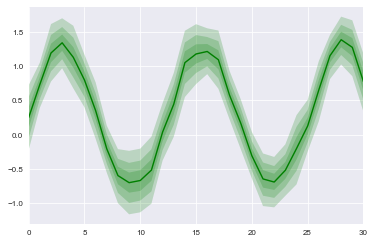

In [4]:
# 1、时间线图表 - tsplot()
# 简单示例

x = np.linspace(0,15,31)
data = np.sin(x)+np.random.rand(10,31)+np.random.randn(10,1)
print(data.shape)
print(pd.DataFrame(data).head())  # 创建数据

sns.tsplot(data=data,
           err_style='ci_band',   # 误差数据风格，可选：ci_band, ci_bars, boot_traces, boot_kde, unit_traces, unit_points
           interpolate=True,      # 是否连线
           ci=[40,70,90],         # 设置误差区间 
           color='g')             # 设置颜色



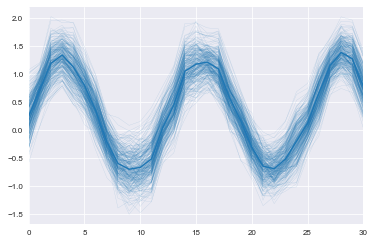

In [6]:
# 1、时间线图表 - tsplot()
# 简单示例

sns.tsplot(data=data,
           err_style='boot_traces',
           n_boot=300)                      # 迭代次数

   timepoint  ROI  subject  BOLD signal
0        0.0  IPS        0     0.513433
1        0.0  IPS        1    -0.414368
2        0.0  IPS        2     0.214695
3        0.0  IPS        3     0.814809
4        0.0  IPS        4    -0.894992
一共有6000条数据
timepoint为0.0时的数据量有60
timepoint共有100条唯一值


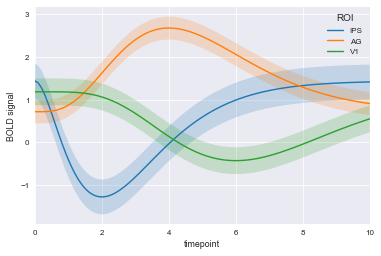

In [10]:
# 1、时间线图表 - tsplot()
# 参数设置

gammas = sns.load_dataset('gammas')
print(gammas.head())
print(f'一共有{len(gammas)}条数据')
print(f"timepoint为0.0时的数据量有{len(gammas[gammas['timepoint']==0])}")
print(f"timepoint共有{len(gammas['timepoint'].value_counts())}条唯一值")

sns.tsplot(time='timepoint',       # 时间数据，x轴
           value='BOLD signal',    # y轴value
           unit='subject',
           condition='ROI',        # 分类
           data=gammas)

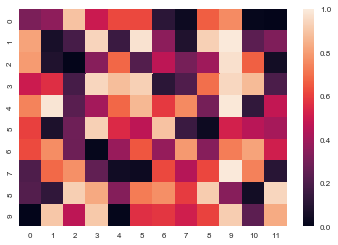

In [11]:
# 2、热图 - heatmap()
# 简单示例

df = pd.DataFrame(np.random.rand(10,12))   # 创建数据 - 10*12图表
sns.heatmap(df,                            # 加载数据
            vmin=0,                        # 设置图例最大最小值
            vmax=1)

year      1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                        
January    112   115   145   171   196   204   242   284   315   340   360   
February   118   126   150   180   196   188   233   277   301   318   342   
March      132   141   178   193   236   235   267   317   356   362   406   
April      129   135   163   181   235   227   269   313   348   348   396   
May        121   125   172   183   229   234   270   318   355   363   420   

year      1960  
month           
January    417  
February   391  
March      419  
April      461  
May        472  


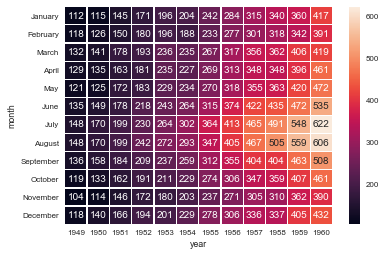

In [14]:
# 2、热图 - heatmap()
# 参数设置

flights = sns.load_dataset('flights')
flights = flights.pivot('month','year','passengers')
print(flights.head())
sns.heatmap(flights,
            annot=True,        # 是否显示数值
            fmt='d',           # 格式化字符串
            linewidths=.2,     # 格子边线宽度
            cbar=True)         # 是否显示图例色带

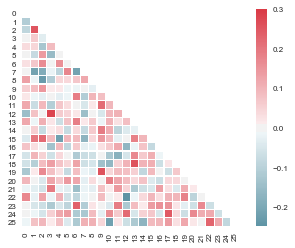

In [15]:
# 2、热图 - heatmap()
# 绘制半边热图

sns.set_style('white')

rs = np.random.RandomState(33)
d = pd.DataFrame(rs.normal(size=(100,26)))         # 创建数据
corr = d.corr()                                    # 求解相关性矩阵表格

mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True              # 设置一个“上三角形”蒙版

cmap = sns.diverging_palette(220,10,as_cmap=True)  # 设置调色盘

sns.heatmap(corr,                                  # 生成半边热图
            mask=mask,
            cmap=cmap,
            vmax=.3,
            center=0,
            square=True,
            linewidths=.2)

'''
【课程2.11】  结构化图表可视化

FacetGrid()

'''

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


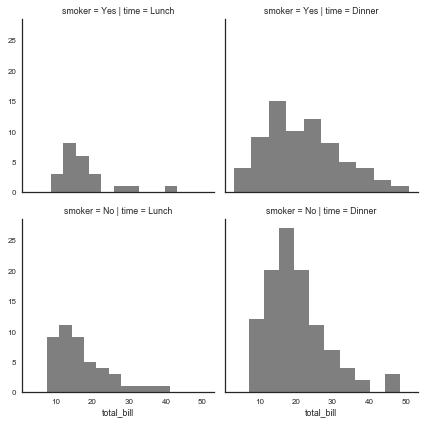

In [18]:
# 1、基本设置
# 绘制直方图

tips = sns.load_dataset('tips')                  # 导入数据
print(tips.head())

g = sns.FacetGrid(tips,col='time',row='smoker')  # 创建一个绘图表格区域，设置好row、col并分组

g.map(plt.hist,                                  # 以total_bill字段数据分别做直方图统计
      'total_bill',
      alpha=.5,
      color='k',
      bins=10)

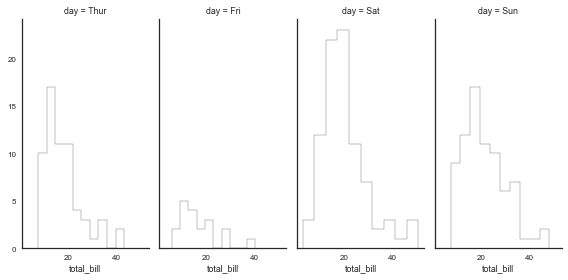

In [19]:
# 1、基本设置
# 绘制直方图

g = sns.FacetGrid(tips,
                  col='day',
                  size=4,       # 图表大小
                  aspect=.5)    # 图表长宽比

g.map(plt.hist,
      'total_bill',
      bins=10,
      histtype='step',          #'bar', 'barstacked', 'step', 'stepfilled'
      color='k')

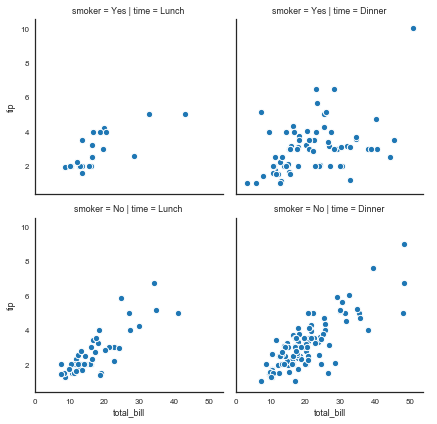

In [20]:
# 1、基本设置
# 绘制散点图

g = sns.FacetGrid(tips,col='time',row='smoker')   # 创建一个绘图表格区域，设置好row、col并分组

g.map(plt.scatter,
      'total_bill','tip',                         # share{x,y} → 设置x、y数据
      edgecolor='w',
      s=40,                                       # 设置点大小，描边宽度及颜色
      linewidth=1)
g.add_legend()                                    # 添加图例

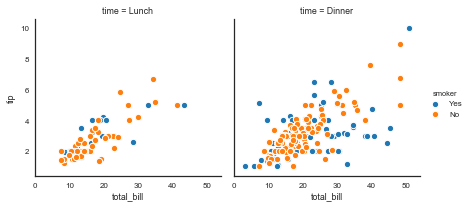

In [21]:
# 1、基本设置
# 分类

g = sns.FacetGrid(tips,col='time',hue='smoker')    # 创建一个绘图表格区域，设置好col并分组，按hue分类
g.map(plt.scatter,
      'total_bill','tip',                          # share{x,y} → 设置x、y数据
      edgecolor='w',
      s=40,                                        # 设置点大小，描边宽度及颜色
      linewidth=1)
g.add_legend()                                     # 添加图例

   Unnamed: 0  subject attention  solutions  score
0           0        1   divided          1    2.0
1           1        2   divided          1    3.0
2           2        3   divided          1    3.0
3           3        4   divided          1    5.0
4           4        5   divided          1    4.0


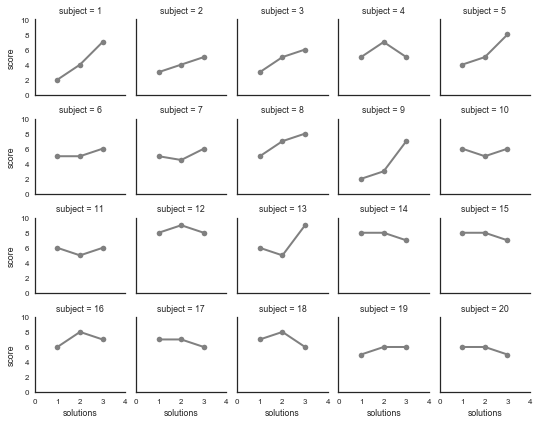

In [24]:
# 2、图表矩阵

attend = sns.load_dataset('attention')    # 加载数据
print(attend.head())

g = sns.FacetGrid(attend,                 # 设置每行的图表数量
                  col='subject',
                  col_wrap=5,
                  size=1.5)

g.map(plt.plot,                          # 绘制图表矩阵
      'solutions','score',
      marker='o',
      color='gray',
      linewidth=2)

g.set(xlim = (0,4),                      # 设置x，y轴刻度
      ylim = (0,10),
      xticks = [0,1,2,3,4],
      yticks = [0,2,4,6,8,10]
      )